In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer

In [2]:
digit = load_digits()

score_board = {'Classifier': [], 'Accuracy': []}

In [3]:
X = digit.data*10
y = digit.target

mn_mx_scaler = MinMaxScaler()
X = mn_mx_scaler.fit_transform(X)

spliter = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2)

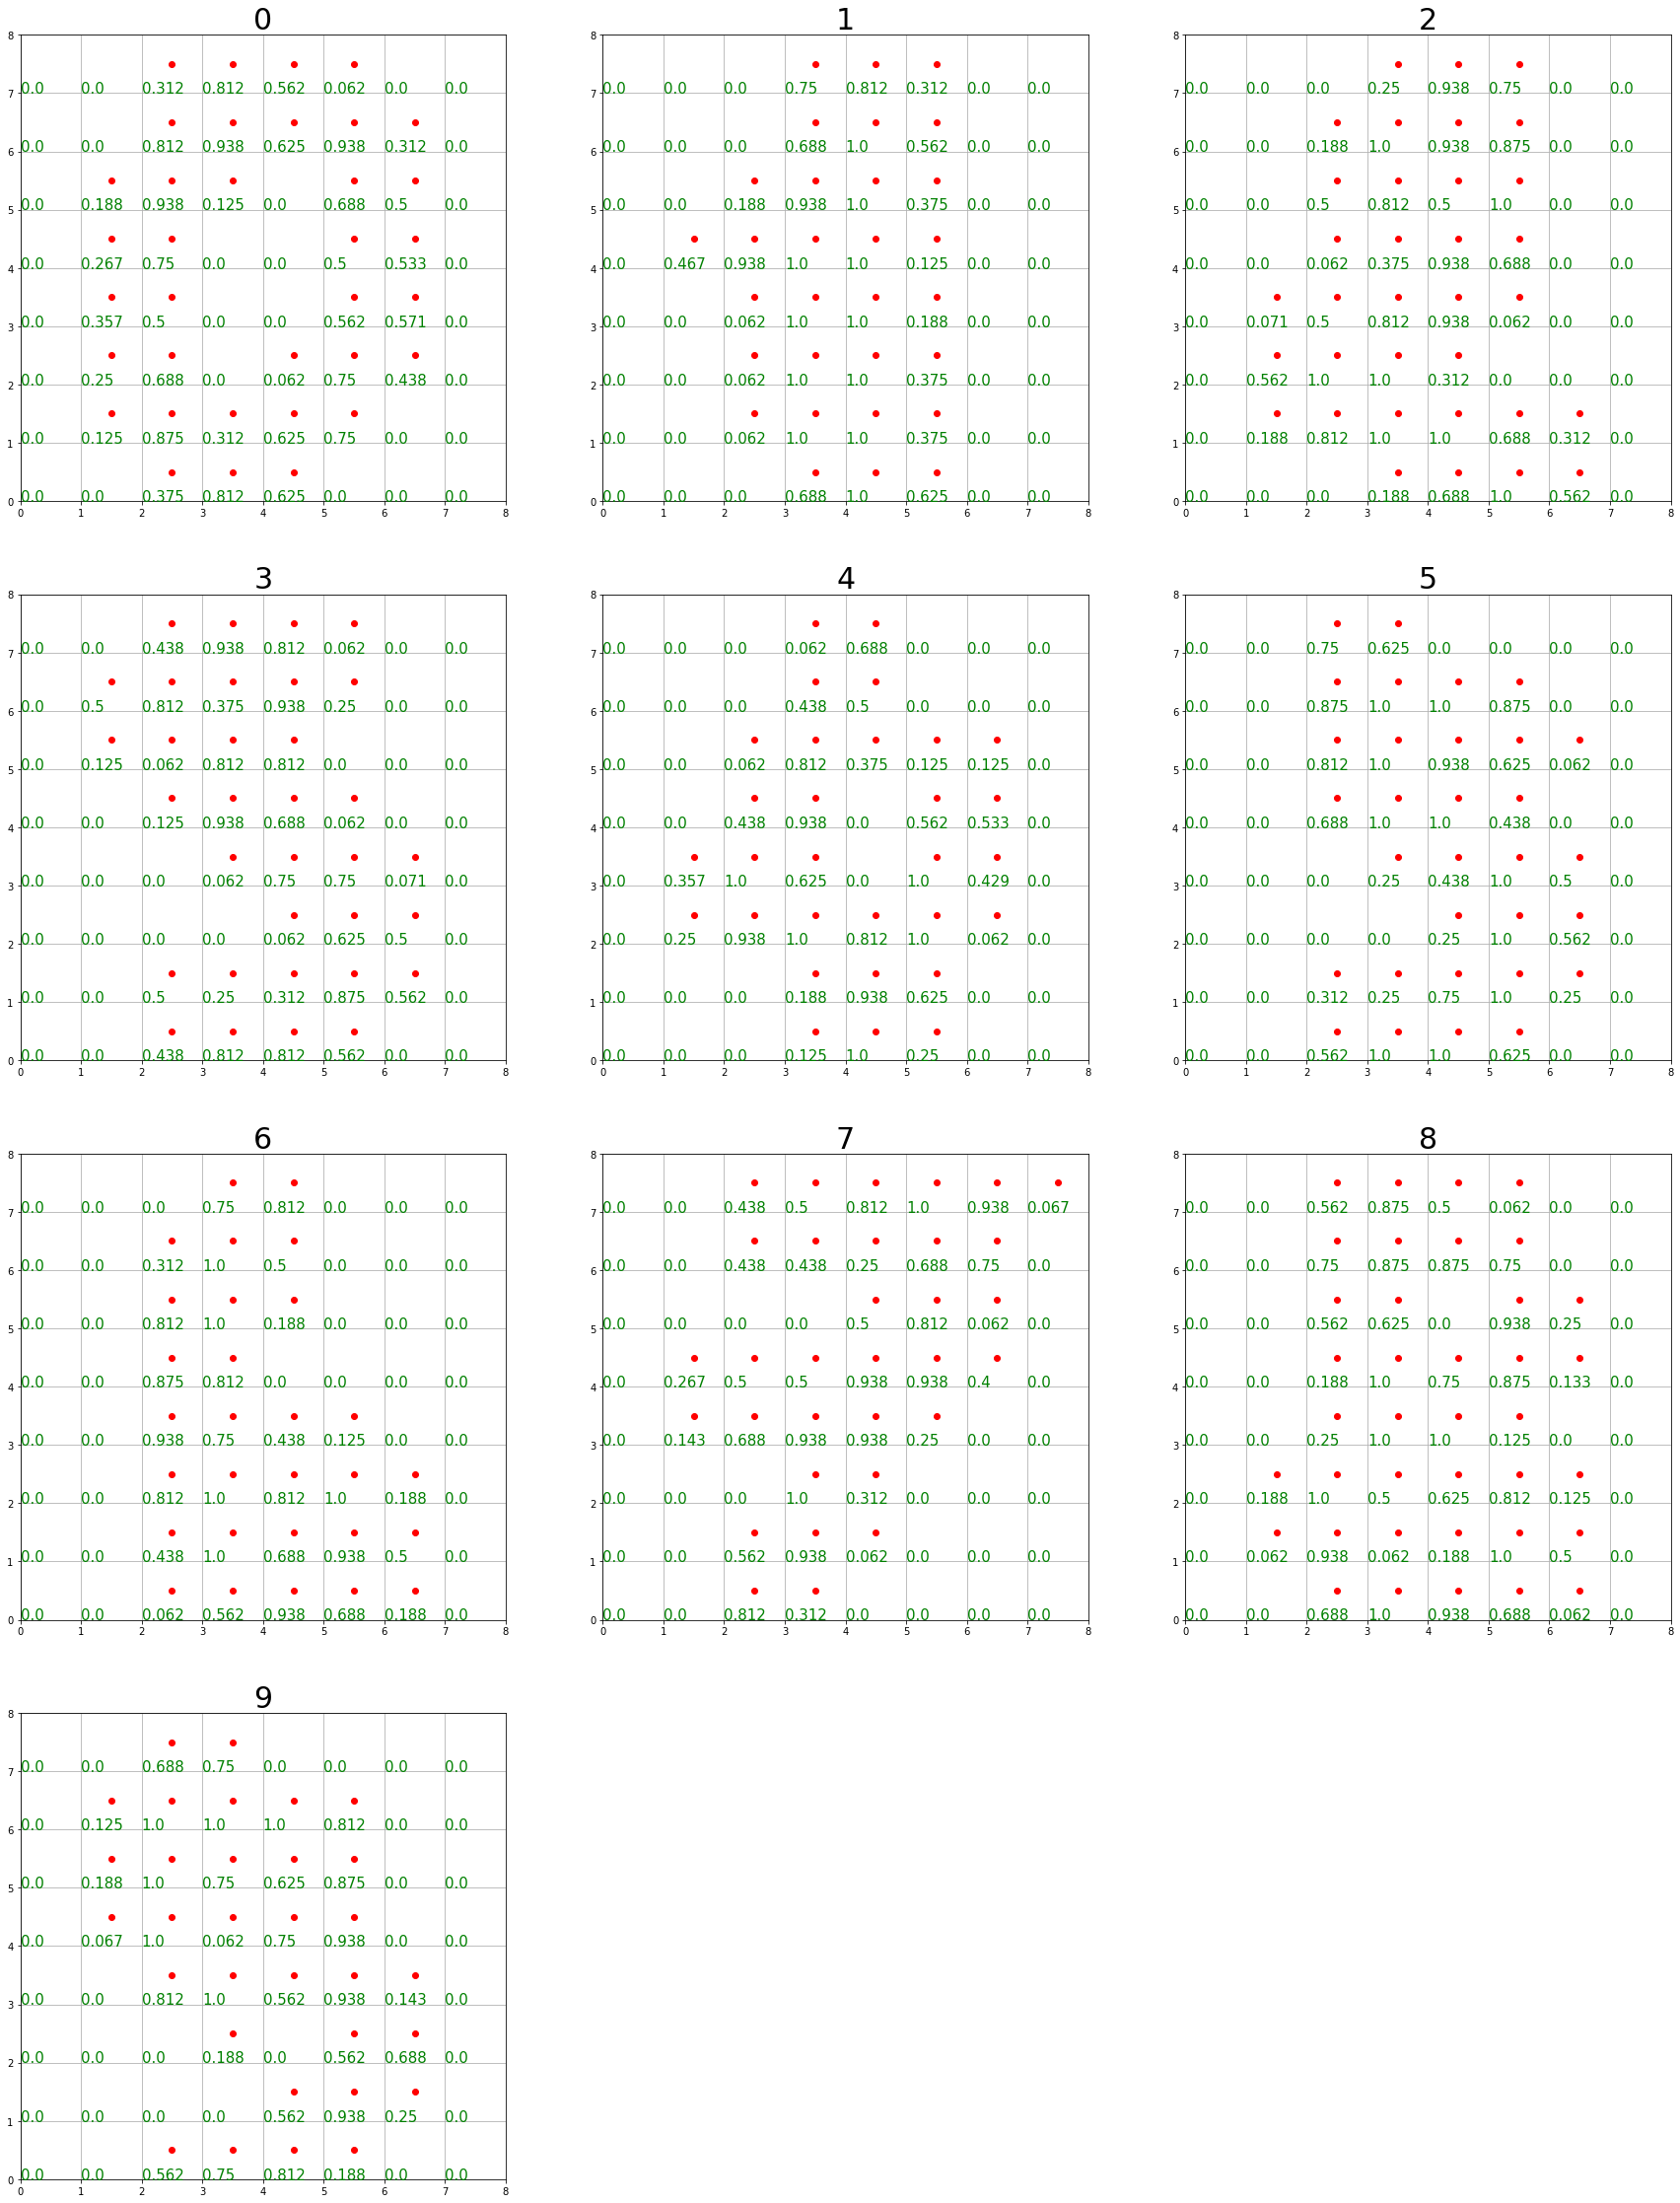

In [4]:
fig = plt.figure(figsize = (30, 40))

for i in range(10):
    axs = fig.add_subplot(4, 3, i+1)
    axs.set_xticks(range(9))
    axs.set_yticks(range(9))
    axs.tick_params(labelsize = 10)
    axs.grid(True)
    axs.set_title(i, fontsize = 30)
    tmp = X[y == i][0].reshape(8, 8)
    for j in range(8):
        for k in range(8):
            axs.text(k, 7-j, round(tmp[j][k], 3), fontsize = 15, color = 'green')
            if tmp[j][k] > 0:
                axs.plot(k+0.5, 7-j+0.5, 'ro')
    axs.axis([0, 8, 0, 8])

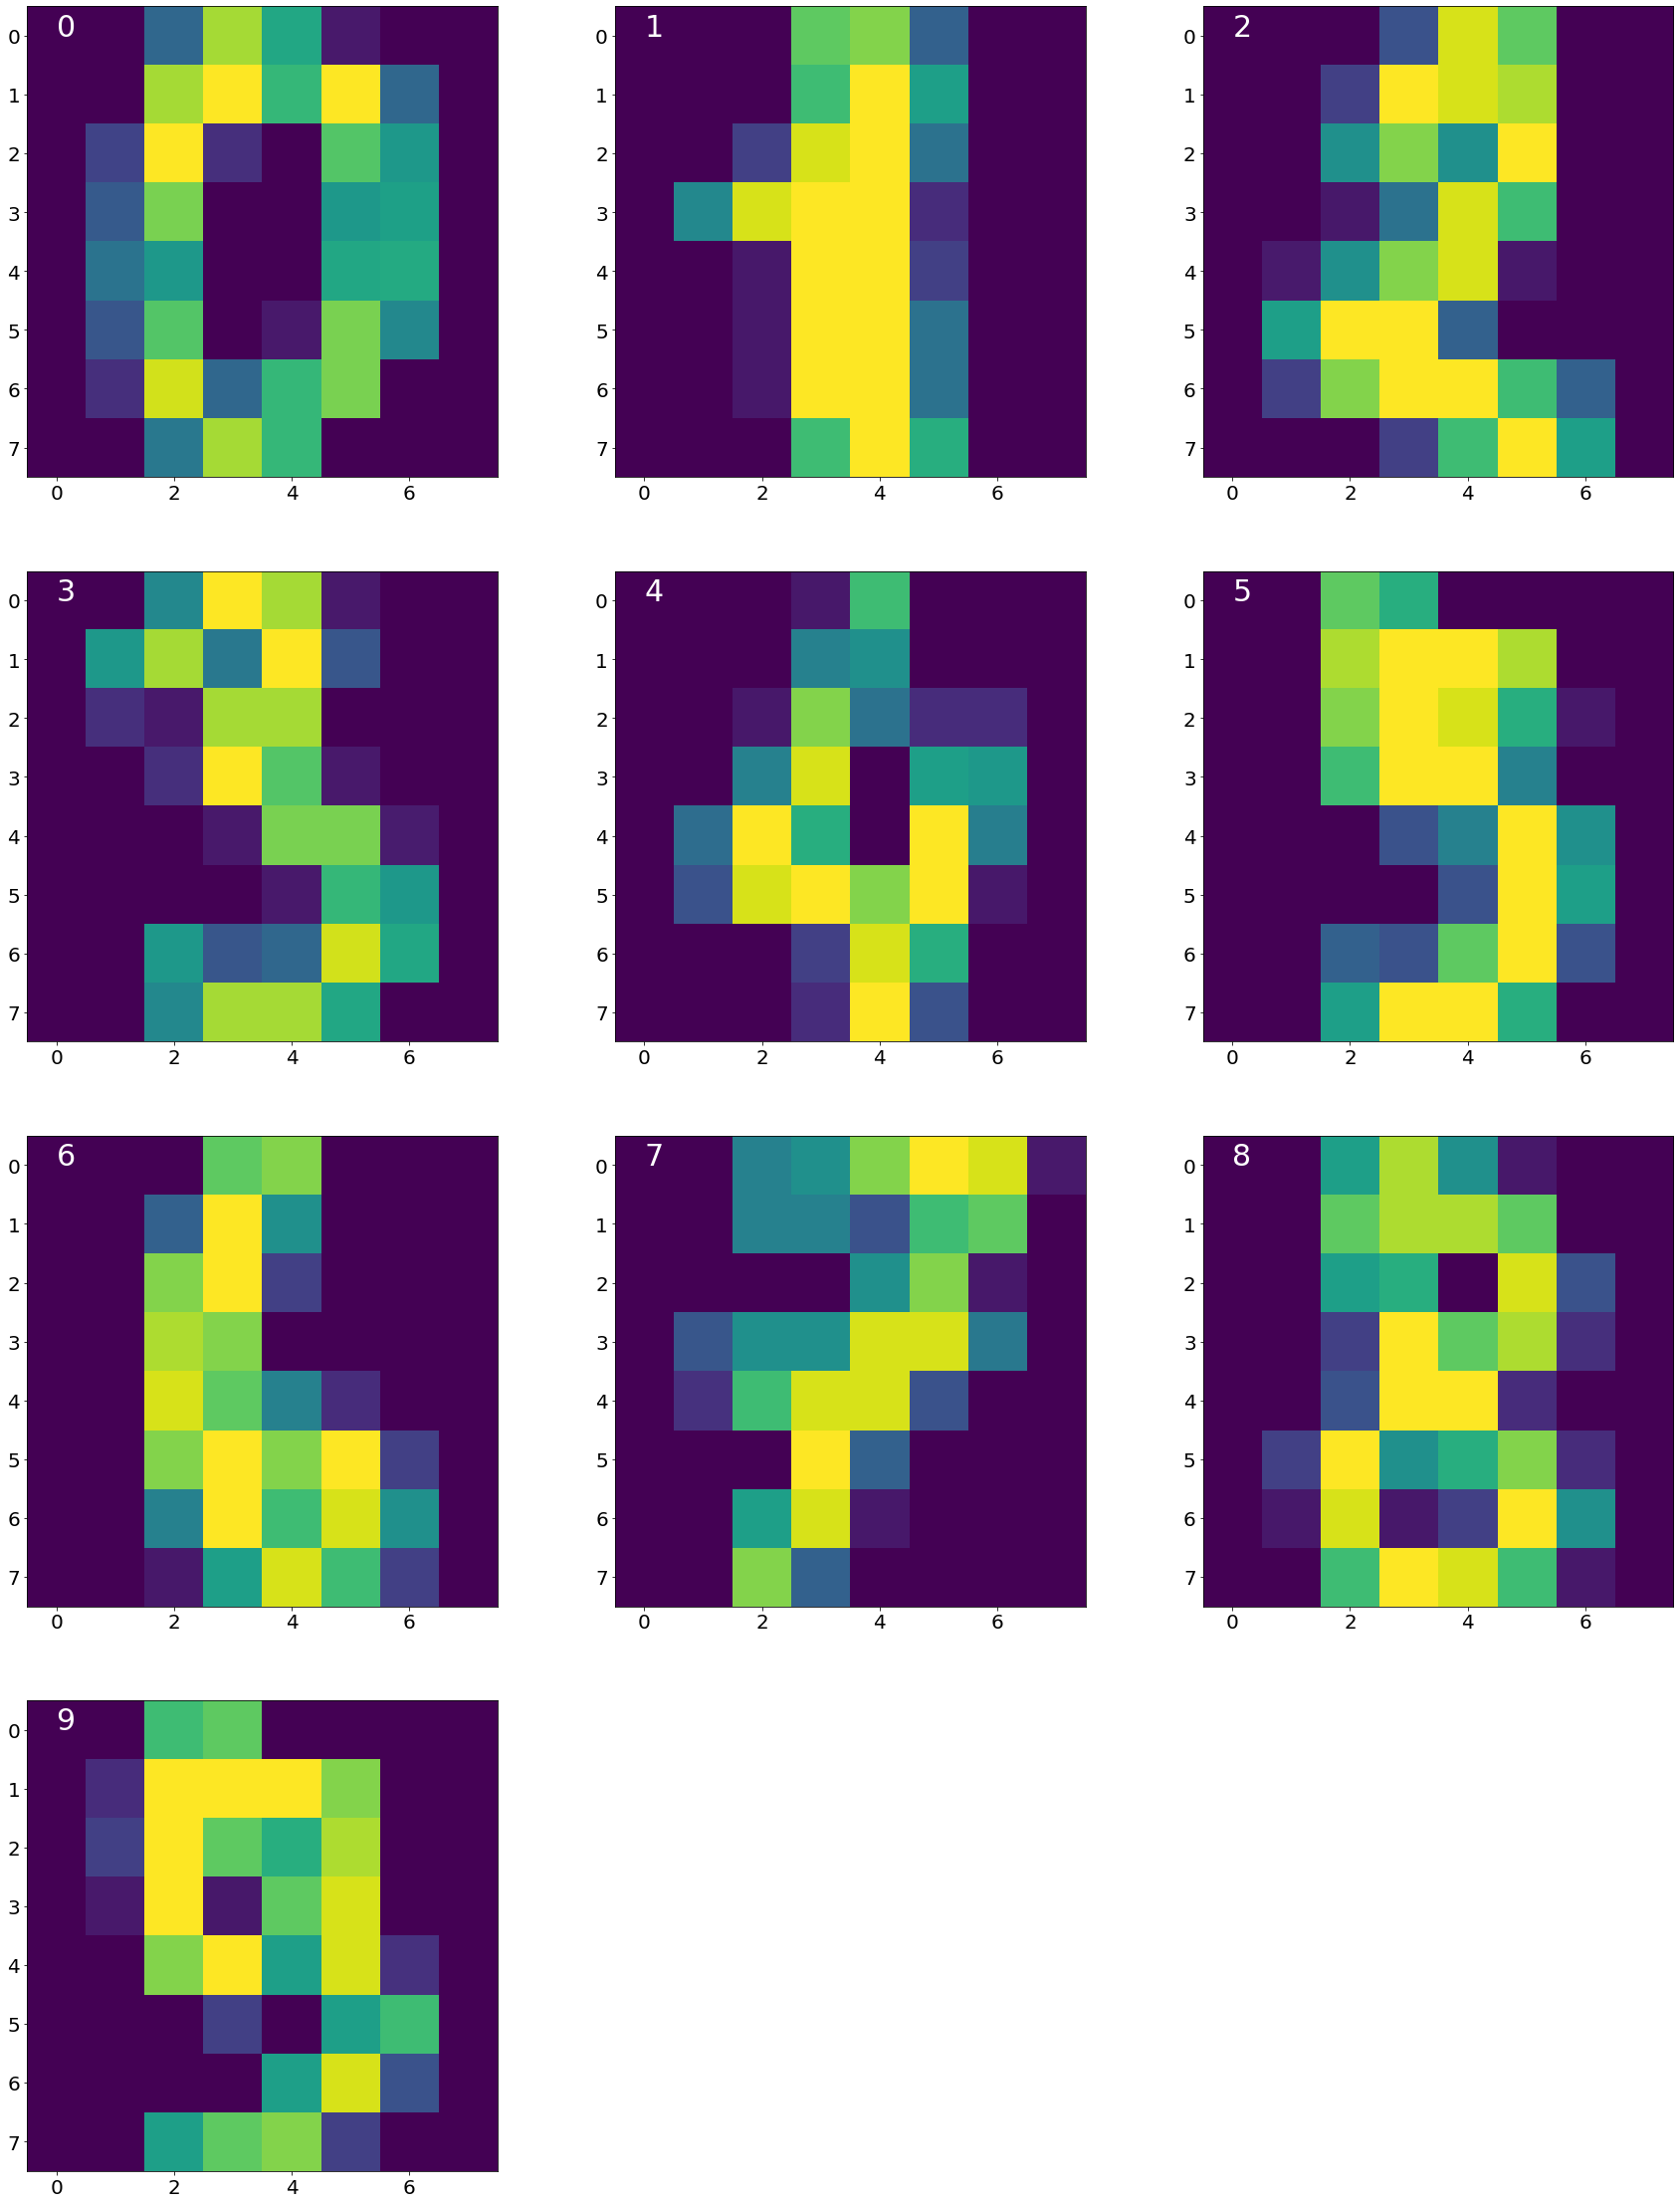

In [5]:
fig = plt.figure(figsize = (30, 40))

for i in range(10):
    axs = fig.add_subplot(4, 3, i+1)
    axs.imshow(X[y == i][0].reshape(8, 8))
    axs.text(0, 0, i, color = 'white', fontsize = 30)
    axs.tick_params(labelsize = 20)

In [6]:
for train_index, test_index in spliter.split(X, y):
    strat_train_x = X[train_index]
    strat_train_y = y[train_index]
    strat_test_x = X[test_index]
    strat_test_y = y[test_index]

In [7]:
log_reg = LogisticRegression()
grid_model = GridSearchCV(log_reg, param_grid = {'max_iter': [5000, 6000, 7000]}, cv = 3)
grid_model.fit(strat_train_x, strat_train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [5000, 6000, 7000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
grid_model.best_params_

{'max_iter': 5000}

In [9]:
clf1 = LogisticRegression(**grid_model.best_params_)

In [10]:
score_board['Classifier'].append(clf1.__class__.__name__)
score_board['Accuracy'].append(cross_val_score(clf1, strat_train_x, strat_train_y, cv = 3))

In [11]:
tree_clf = DecisionTreeClassifier()
grid_model = GridSearchCV(tree_clf, param_grid = {'max_depth': [5, 6, 7, 8], 'max_leaf_nodes': [20, 22, 24, 25]}, cv = 3)
grid_model.fit(strat_train_x, strat_train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8],
                         '

In [12]:
grid_model.best_params_

{'max_depth': 8, 'max_leaf_nodes': 25}

In [13]:
clf2 = DecisionTreeClassifier(**grid_model.best_params_)

In [14]:
score_board['Classifier'].append(clf2.__class__.__name__)
score_board['Accuracy'].append(cross_val_score(clf2, strat_train_x, strat_train_y, cv = 3))

In [15]:
svm_clf = SVC(probability = True)
grid_model = GridSearchCV(svm_clf, param_grid = {'C': [3, 5, 7], 'degree': [2, 3, 4]})
grid_model.fit(strat_train_x, strat_train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [3, 5, 7], 'degree': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
grid_model.best_params_

{'C': 5, 'degree': 2}

In [17]:
clf3 = SVC(**grid_model.best_params_, probability = True)

In [18]:
score_board['Classifier'].append(clf3.__class__.__name__)
score_board['Accuracy'].append(cross_val_score(clf3, strat_train_x, strat_train_y, cv = 3))

In [19]:
forest_clf = RandomForestClassifier()
grid_model = GridSearchCV(forest_clf, param_grid = {'max_depth': [6, 7, 8, 9, 10], 'max_leaf_nodes': [22, 23, 24, 25, 26], 'n_estimators': [20, 30, 50, 70]})
grid_model.fit(strat_train_x, strat_train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [20]:
grid_model.best_params_

{'max_depth': 9, 'max_leaf_nodes': 26, 'n_estimators': 70}

In [21]:
clf4 = RandomForestClassifier(**grid_model.best_params_)

In [22]:
score_board['Classifier'].append(clf4.__class__.__name__)
score_board['Accuracy'].append(cross_val_score(clf4, strat_train_x, strat_train_y, cv = 3))

In [23]:
extra_clf = ExtraTreesClassifier()
grid_model = GridSearchCV(extra_clf, param_grid = {'n_estimators': [10, 20, 30, 40], 'max_depth': [6, 8, 10, 12], 'max_leaf_nodes': [15, 20, 25, 30]}, cv = 3)
grid_model.fit(strat_train_x, strat_train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [24]:
grid_model.best_params_

{'max_depth': 8, 'max_leaf_nodes': 30, 'n_estimators': 40}

In [25]:
clf5 = ExtraTreesClassifier(**grid_model.best_params_)

In [26]:
score_board['Classifier'].append(clf5.__class__.__name__)
score_board['Accuracy'].append(cross_val_score(clf5, strat_train_x, strat_train_y, cv = 3))

In [27]:
clf6 = VotingClassifier([('c1', clf1), ('c2', clf2), ('c3', clf3), ('c4', clf4), ('c5', clf5)], voting = 'soft')

In [28]:
score_board['Classifier'].append(clf6.__class__.__name__+' (soft voting)')
score_board['Accuracy'].append(cross_val_score(clf6, strat_train_x, strat_train_y, cv = 3))

In [29]:
# clf6.fit(strat_train_x, strat_train_y)

# test_pred = clf6.predict(unscaled_data)
# score_board['Unscaled Accuracy'].append(accuracy_score(y, test_pred))
# test_pred = clf6.predict(after_scaled_data)
# score_board['After Scaled Accuracy'].append(accuracy_score(y, test_pred))

In [30]:
clf7 = VotingClassifier([('c1', clf1), ('c2', clf2), ('c3', clf3), ('c4', clf4), ('c5', clf5)], voting = 'hard')

In [31]:
score_board['Classifier'].append(clf7.__class__.__name__+' (hard voting)')
score_board['Accuracy'].append(cross_val_score(clf7, strat_train_x, strat_train_y, cv = 3))

In [32]:
ada_boost = AdaBoostClassifier()
grid_model = GridSearchCV(ada_boost, param_grid = {'n_estimators': [20, 40, 50, 60], 'learning_rate': [0.001, 0.01, 0.1, 1.0]}, cv = 3)
grid_model.fit(strat_train_x, strat_train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [20, 40, 50, 60]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 40}

In [34]:
clf8 = AdaBoostClassifier(**grid_model.best_params_)

In [35]:
score_board['Classifier'].append(clf8.__class__.__name__)
score_board['Accuracy'].append(cross_val_score(clf8, strat_train_x, strat_train_y, cv = 3))

In [36]:
grad_boost = GradientBoostingClassifier()
grid_model = GridSearchCV(grad_boost, param_grid = {'learning_rate': [0.01, 0.1, 1.0], 'subsample': [0.25, 0.33, 1.0], 'n_estimators': [40, 50, 60]}, cv = 3)
grid_model.fit(strat_train_x, strat_train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [37]:
grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 60, 'subsample': 1.0}

In [38]:
clf9 = GradientBoostingClassifier(**grid_model.best_params_)

In [39]:
score_board['Classifier'].append(clf9.__class__.__name__)
score_board['Accuracy'].append(cross_val_score(clf9, strat_train_x, strat_train_y, cv = 3))

In [40]:
score_board['Accuracy'] = [scores.mean() for scores in score_board['Accuracy']]

In [41]:
score_board_df = pd.DataFrame(score_board)
score_board_df

,Classifier,Accuracy
0,LogisticRegression,0.961030
1,DecisionTreeClassifier,0.816980
2,SVC,0.986082
3,RandomForestClassifier,0.934586
4,ExtraTreesClassifier,0.938761
5,VotingClassifier (soft voting),0.967989
6,VotingClassifier (hard voting),0.958246
7,AdaBoostClassifier,0.729993
8,GradientBoostingClassifier,0.948504


In [46]:
clf3.fit(X, y)
joblib.dump(clf3, 'digit_clf1.pkl')

['digit_clf1.pkl']

In [47]:
clf6.fit(X, y)
joblib.dump(clf6, 'digit_clf2.pkl')

['digit_clf2.pkl']

In [59]:
joblib.dump(mn_mx_scaler, 'scaler.pkl')

['scaler.pkl']